In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score

In [2]:
df =  pd.read_csv('aids_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [3]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [5]:
#cek missing Values
print(df.isnull().sum())

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
cid        0
dtype: int64


In [6]:
#cek duplicates
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


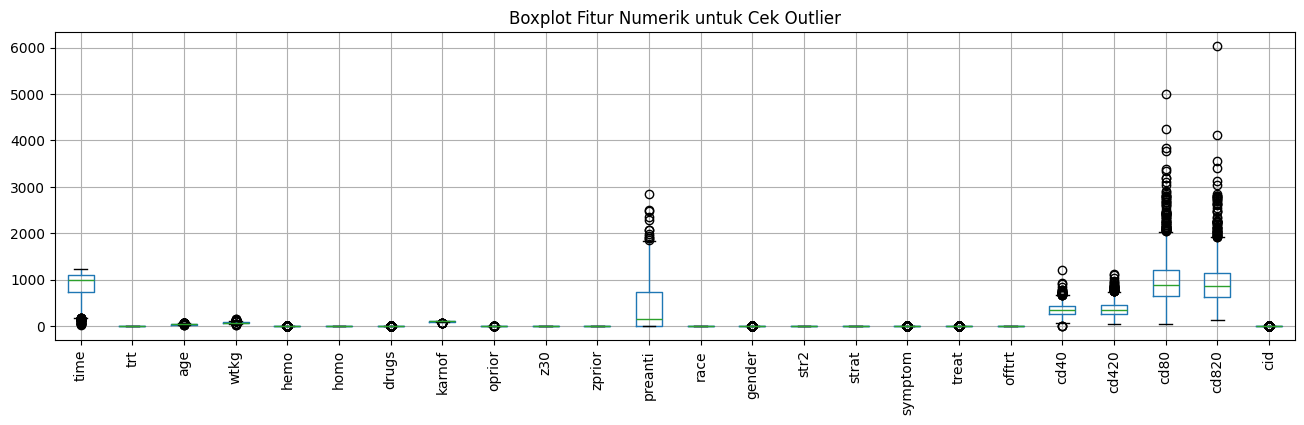

In [27]:
#outlier
plt.figure(figsize=(16, 4))
df.select_dtypes(include=[np.number]).boxplot(rot=90)
plt.title('Boxplot Fitur Numerik untuk Cek Outlier')
plt.show()

cid
0    1618
1     521
Name: count, dtype: int64
cid
0    0.756428
1    0.243572
Name: proportion, dtype: float64


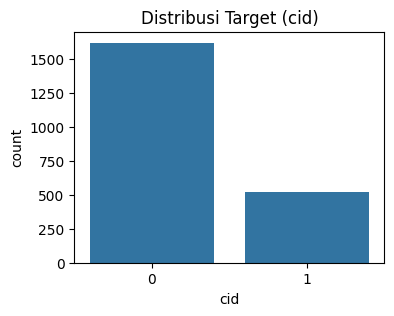

In [29]:
#cek keseimbangan target
print(df['cid'].value_counts())
print(df['cid'].value_counts(normalize=True))

plt.figure(figsize=(4,3))
sns.countplot(x='cid', data=df)
plt.title("Distribusi Target (cid)")
plt.show()

<Figure size 1600x800 with 0 Axes>

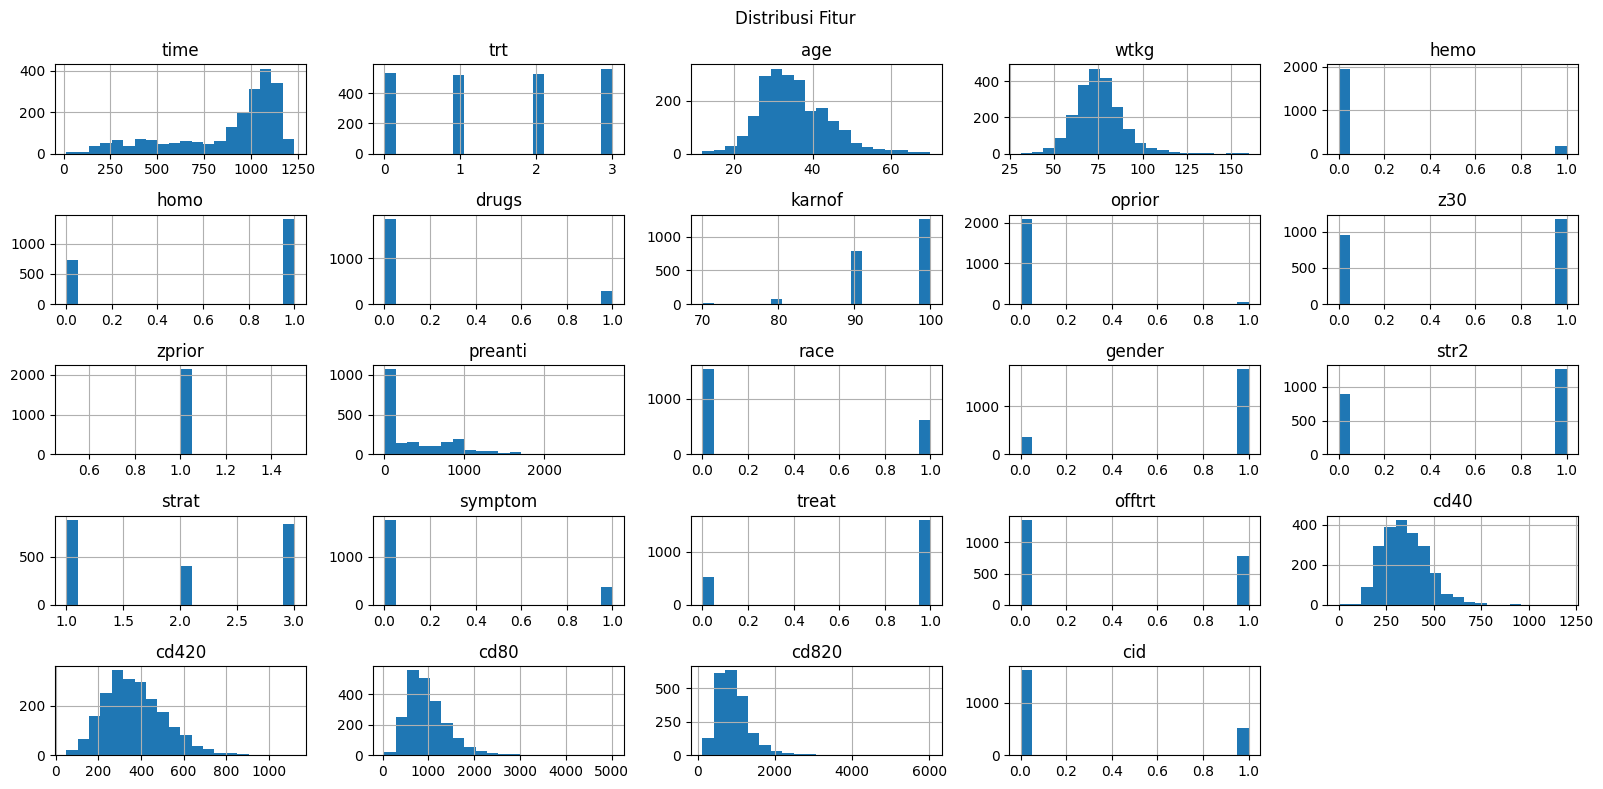

In [34]:
#Distribuci data
plt.figure(figsize=(16, 8))
df.hist(figsize=(16, 8), bins=20)
plt.suptitle('Distribusi Fitur')
plt.tight_layout()
plt.show()

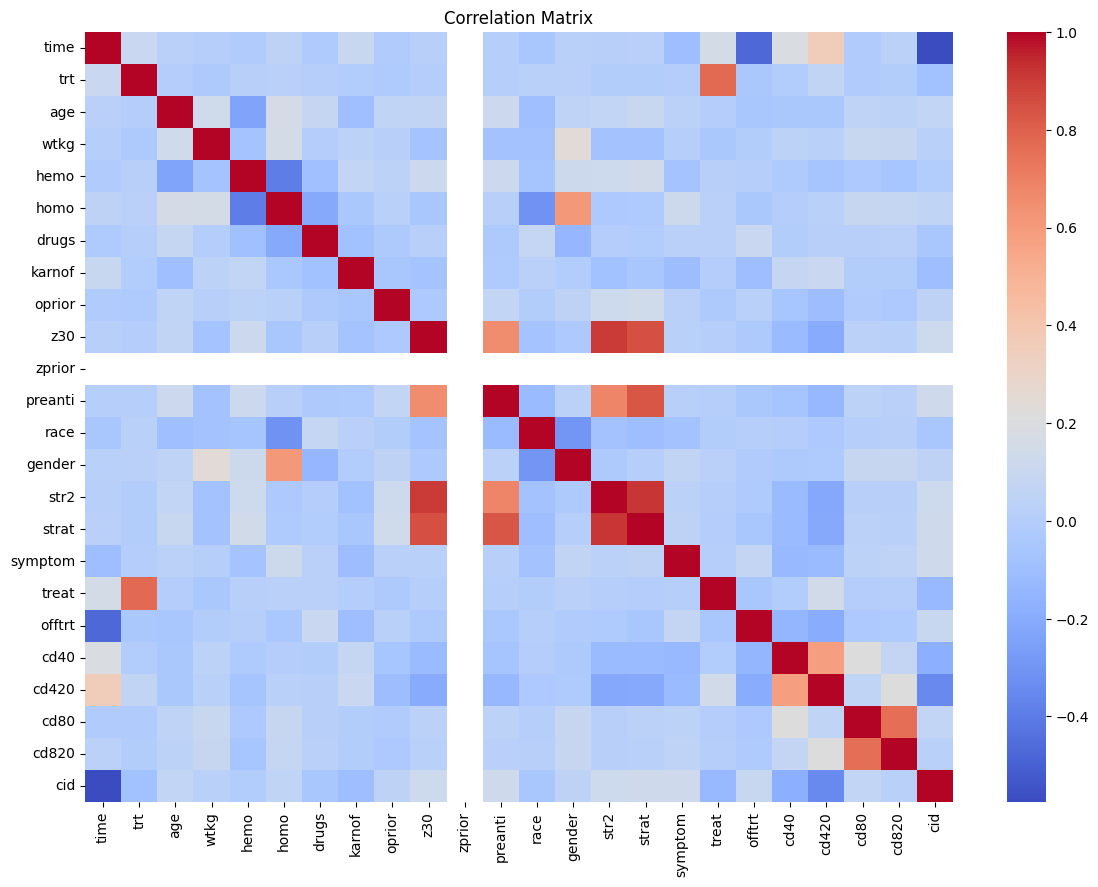

In [33]:
#correlation
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [11]:
print("\n===== Korelasi Fitur dengan Target (cid) =====")
print(corr['cid'].sort_values(ascending=False))


===== Korelasi Fitur dengan Target (cid) =====
cid        1.000000
strat      0.131441
symptom    0.129234
preanti    0.128453
z30        0.125488
str2       0.123390
offtrt     0.092850
age        0.070384
cd80       0.065338
homo       0.054279
gender     0.045118
oprior     0.041251
cd820      0.019494
wtkg       0.016205
hemo      -0.011154
drugs     -0.049794
race      -0.055977
trt       -0.084360
karnof    -0.102944
treat     -0.129560
cd40      -0.185647
cd420     -0.345908
time      -0.574989
zprior          NaN
Name: cid, dtype: float64


In [35]:
X = df.drop(columns=[target])
y = df[target]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

Modelling

In [38]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Net': MLPClassifier(max_iter=300, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

params = {
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [1, 10], 'kernel': ['rbf', 'linear']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # GaussianNB tidak banyak parameter
    'Neural Net': {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.01]},
    'Decision Tree': {'max_depth': [None, 10, 20]}
}


In [42]:
# Cross-validation dan Tuning
best_estimators = {}
cv_results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nModel: {name}")
    if params[name]:
        grid = GridSearchCV(model, params[name], cv=skf, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_estimators[name] = grid.best_estimator_
        print("Best Params:", grid.best_params_)
        print("Best CV ROC AUC:", grid.best_score_)
    else:
        model.fit(X_train, y_train)
        best_estimators[name] = model
        scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
        print("Mean CV ROC AUC:", np.mean(scores))


Model: Random Forest
Best Params: {'max_depth': 10, 'n_estimators': 100}
Best CV ROC AUC: 0.9248105232364529

Model: SVM
Best Params: {'C': 1, 'kernel': 'rbf'}
Best CV ROC AUC: 0.9105479173285282

Model: KNN
Best Params: {'n_neighbors': 7}
Best CV ROC AUC: 0.7734111988945276

Model: Naive Bayes
Mean CV ROC AUC: 0.8377463886940332

Model: Neural Net
Best Params: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Best CV ROC AUC: 0.9137308706685883

Model: Decision Tree
Best Params: {'max_depth': 10}
Best CV ROC AUC: 0.8210911390573561


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Random Forest ===
Accuracy: 0.8995327102803738
Confusion Matrix:
 [[308  16]
 [ 27  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       324
           1       0.83      0.74      0.78       104

    accuracy                           0.90       428
   macro avg       0.87      0.85      0.86       428
weighted avg       0.90      0.90      0.90       428

ROC AUC: 0.9247091642924976

=== SVM ===
Accuracy: 0.883177570093458
Confusion Matrix:
 [[312  12]
 [ 38  66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       324
           1       0.85      0.63      0.73       104

    accuracy                           0.88       428
   macro avg       0.87      0.80      0.83       428
weighted avg       0.88      0.88      0.88       428

ROC AUC: 0.9022139126305793

=== KNN ===
Accuracy: 0.8457943925233645
Confusion Matrix:
 [[31

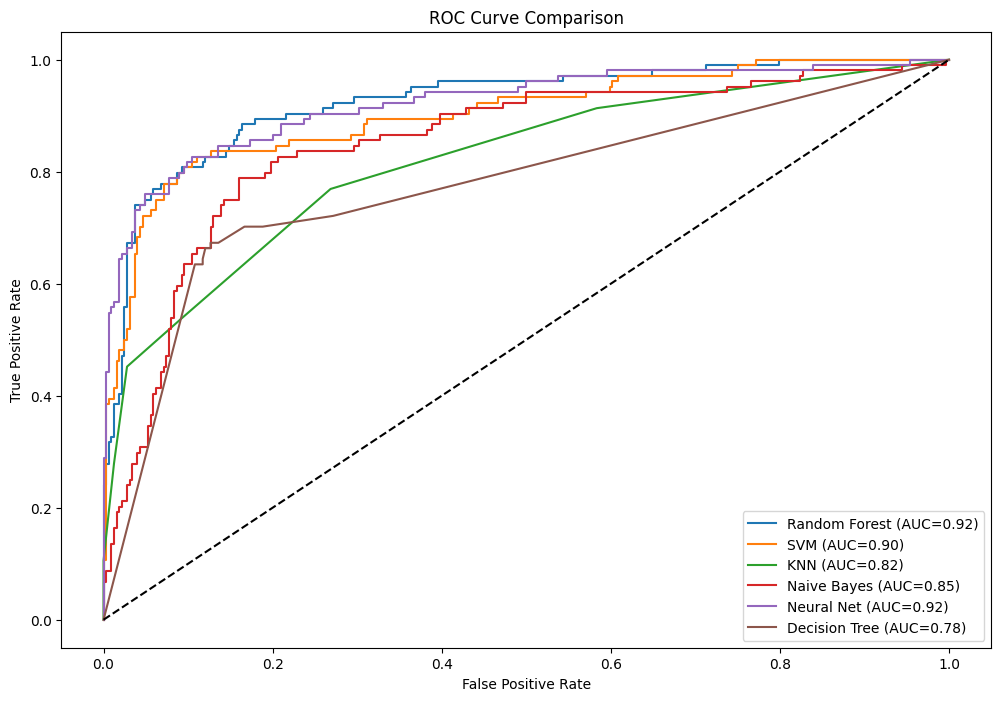

In [43]:
# Holdout
plt.figure(figsize=(12, 8))
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC:", auc_score)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()